<h1 align = "center">Are Yelp reviews gendered ?</h1>

In [2]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [3]:
%matplotlib inline 

In [4]:
import json
import pyprind
import collections
import matplotlib.pyplot as plt
from textblob import TextBlob

In [5]:
# load gender detector

from gender_detector import GenderDetector 
detector = GenderDetector('us')

In [6]:
# load all users

users = {}

with open("../yelp_dataset/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json", "rb") as f:
    for line in f:
        user = json.loads(line.strip())
        users[user['user_id']] = user

In [ ]:
# detect all names' gender

name_set = set()

for user in users.values():
    name_set.add(user['name'])

bar = pyprind.ProgBar(len(name_set), width = 80)

# set mapping
gender = {}

for name in name_set:
    bar.update()
    try:
        gender[name] = detector.guess(name)
    except:
        gender[name] = 'unknown'

In [ ]:
# save to file

with open("gender.json", "wb") as f:
    json.dump(gender, f)

In [7]:
with open("gender.json", "rb") as f:
    gender = json.load(f)

In [8]:
# assign gender to users

for user in users.values():
    try:
        user['gender'] = gender[user['name']]
    except:
        user['gender'] = 'unknown'

In [9]:
gender_list = [user['gender'] for user in users.values()]

print "total number of users is", len(gender_list)

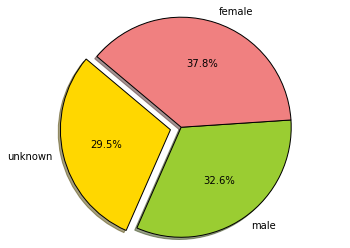

In [10]:
counter=collections.Counter(gender_list)

labels = counter.keys()
sizes = counter.values()
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [11]:
reviews = []
with open("../yelp_dataset/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json", "rb") as f:
    for line in f:
        reviews.append(json.loads(line.strip()))

In [12]:
bar = pyprind.ProgBar(len(reviews), width = 80)

for review in reviews:
    bar.update()
    review['text_blob'] = TextBlob(review['text'])

In [13]:
m_reviews = []
f_reviews = []
for review in reviews:
    user = users[review['user_id']]
    if user['gender'] == 'male':
        m_reviews.append(review)
    elif user['gender'] == 'female':
        f_reviews.append(review)

<h1 align = "center">Text Analysis</h1>

### 1. Number of words

In [14]:
def num_words_dist(review_set):
    
    bar = pyprind.ProgBar(len(review_set), width = 80)
    
    ret = []

    for review in review_set:
        bar.update()
        n = len(review['text'].split(" "))
        ret.append(n)
    return ret

m_num_word_dist = num_words_dist(m_reviews)
f_num_word_dist = num_words_dist(f_reviews)

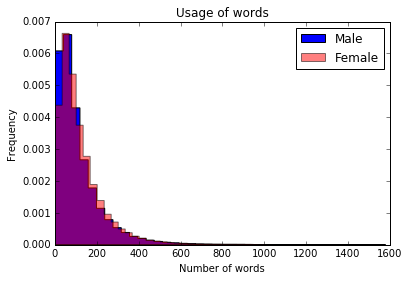

In [15]:
plt.hist(m_num_word_dist, bins=40, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist(f_num_word_dist, bins=40, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Usage of words")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.legend()
plt.show()

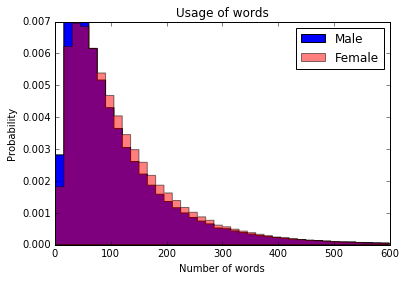

In [16]:
plt.hist([n for n in m_num_word_dist if n <600], bins=40, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist([n for n in f_num_word_dist if n <600], bins=40, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Usage of words")
plt.xlabel("Number of words")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [238]:
m_avg = sum(m_num_word_dist) / float(len(m_num_word_dist))
f_avg = sum(f_num_word_dist) / float(len(f_num_word_dist))

print "Male_AVG", m_avg
print "Female_AVG", f_avg

### 2. Number of sentences

In [18]:
def num_sentences_dist(review_set):
    bar = pyprind.ProgBar(len(review_set), width = 80)
    
    ret = []
    for review in review_set:
        bar.update()
        segments = review['text'].split(". ")
        n = len(segments)
        ret.append(n)
    return ret

m_num_sen_dist = num_sentences_dist(m_reviews)
f_num_sen_dist = num_sentences_dist(f_reviews)

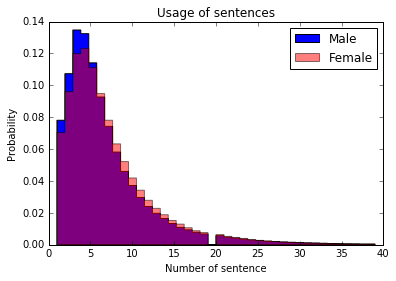

In [19]:
plt.hist([n for n in m_num_sen_dist if n <40], bins=40, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist([n for n in f_num_sen_dist if n <40], bins=40, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Usage of sentences")
plt.xlabel("Number of sentence")
plt.ylabel("Probability")
plt.legend()
plt.show()

### 4. Number of exclamation

In [20]:
def num_ex_dist(review_set):
    bar = pyprind.ProgBar(len(review_set), width = 80)
    
    ret = []
    for review in review_set:
        bar.update()
        n = review['text'].count("!")
        ret.append(n)
    return ret

m_num_ex_dist = num_ex_dist(m_reviews)
f_num_ex_dist = num_ex_dist(f_reviews)

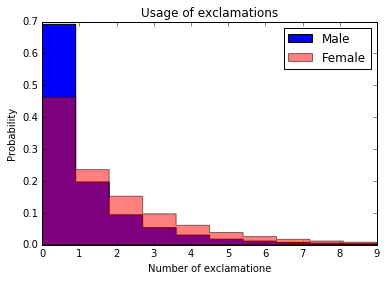

In [57]:
plt.hist([n for n in m_num_ex_dist if n <10], bins=10, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist([n for n in f_num_ex_dist if n <10], bins=10, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Usage of exclamations")
plt.xlabel("Number of exclamatione")
plt.ylabel("Probability")
plt.legend()
plt.show()

### 4. Number of :)

In [276]:
def num_smile_dist(review_set):
    bar = pyprind.ProgBar(len(review_set), width = 80)
    
    ret = []
    for review in review_set:
        bar.update()
        n = review['text'].count(":)")
        ret.append(n)
    return ret

m_num_smile_dist = num_smile_dist(m_reviews)
f_num_smile_dist = num_smile_dist(f_reviews)

In [285]:
m_num = 0.
f_num = 0.

for n in m_num_smile_dist:
    m_num += n
for n in f_num_smile_dist:
    f_num += n

In [286]:
m_num, f_num

(10253.0, 37286.0)

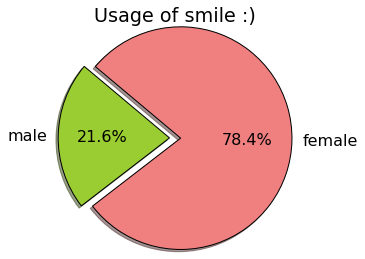

In [288]:
labels = ['male', 'female']
sizes = (m_num, f_num)
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.title("Usage of smile :)")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

### 5. Number of :(

In [284]:
def num_sad_dist(review_set):
    bar = pyprind.ProgBar(len(review_set), width = 80)
    
    ret = []
    for review in review_set:
        bar.update()
        n = review['text'].count(":(")
        ret.append(n)
    return ret

m_num_sad_dist = num_sad_dist(m_reviews)
f_num_sad_dist = num_sad_dist(f_reviews)

In [289]:
m_num = 0.
f_num = 0.

for n in m_num_sad_dist:
    m_num += n
for n in f_num_sad_dist:
    f_num += n

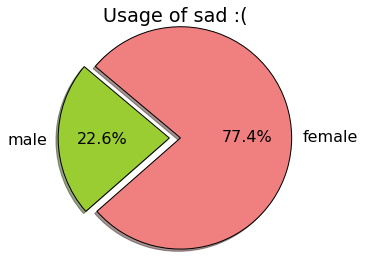

In [290]:
labels = ['male', 'female']
sizes = (m_num, f_num)
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.title("Usage of sad :(")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

### 6. Usage of adj.

In [306]:
def usage(keyword):
    def num_dist(review_set):
        
        bar = pyprind.ProgBar(len(review_set), width = 80)

        ret = []
        for review in review_set:
            bar.update()
            n = review['text'].count(keyword)
            ret.append(n)
        return ret

    m_num_dist = num_dist(m_reviews)
    f_num_dist = num_dist(f_reviews)
    
    m_num = 0.
    f_num = 0.

    for n in m_num_dist:
        m_num += n
    for n in f_num_dist:
        f_num += n
        
    labels = ['male', 'female']
    sizes = (m_num, f_num/37.8*32.6)
    colors = ['yellowgreen', 'lightcoral']
    explode = (0.1, 0)  # explode 1st slice

    # Plot
    plt.title("Usage of "+keyword+"\n")
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

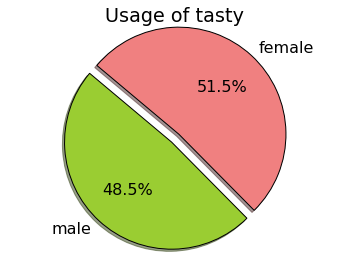

In [298]:
usage("tasty")

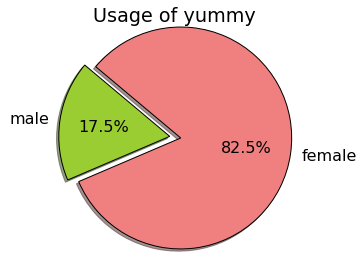

In [299]:
usage("yummy")

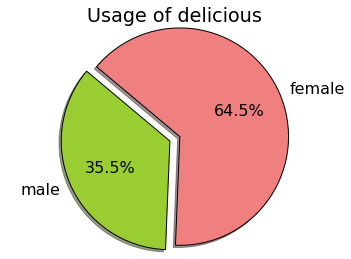

In [300]:
usage("delicious")

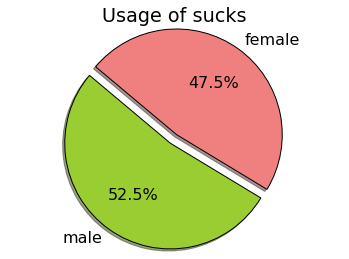

In [302]:
usage("sucks")

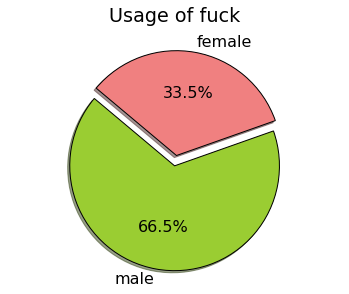

In [307]:
usage("fuck")

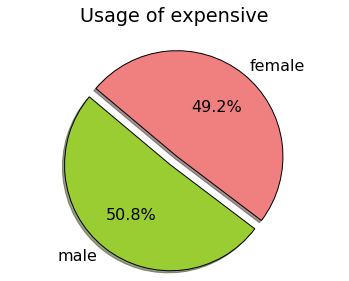

In [308]:
usage("expensive")

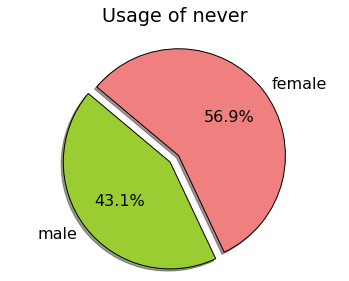

In [309]:
usage("never")

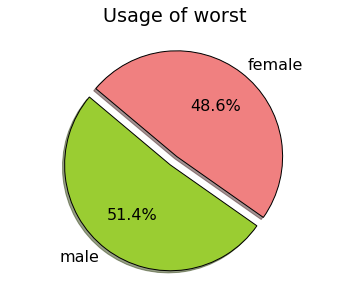

In [310]:
usage("worst")

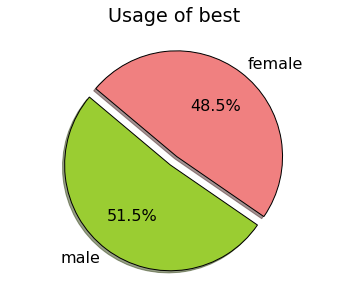

In [311]:
usage("best")

<h1 align="center">Sentiment Analysis</h1>

In [22]:
def rating_dist(review_set):
    bar = pyprind.ProgBar(len(review_set), width = 80)
    
    ret = []
    for review in review_set:
        bar.update()
        n = review['stars']
        ret.append(n)
        
    return ret

m_num_rating_dist = rating_dist(m_reviews)
f_num_rating_dist = rating_dist(f_reviews)

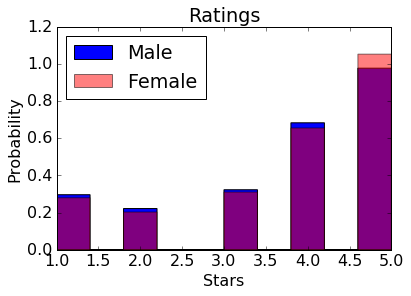

In [242]:
plt.hist([m_num_rating_dist], bins=10, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist([f_num_rating_dist], bins=10, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Ratings")
plt.xlabel("Stars")
plt.ylabel("Probability")
plt.legend(loc=2)
plt.show()

In [240]:
m_avg = sum(m_num_rating_dist) / float(len(m_num_rating_dist))
f_avg = sum(f_num_rating_dist) / float(len(f_num_rating_dist))

In [241]:
print "Male_AVG", m_avg
print "Female_AVG", f_avg

<h1 align="center">Topic Analysis</h1>

In [25]:
import sys
sys.path.append("/Users/erichsu/Documents/research/rake_dir/RAKE-tutorial/")

In [26]:
import rake
import operator
import random
import wordcloud

In [51]:
rake_object = rake.Rake("/Users/erichsu/Documents/research/rake_dir/RAKE-tutorial/SmartStoplist.txt", 5, 3, 20)

In [47]:
def save_to_file(file_name, text):
    f = open(file_name, "wb")
    f.write(text)

def get_good_reviews(review_set):
    good_reviews = [r for r in review_set if r['stars']>=4]
    return good_reviews

def get_bad_reviews(review_set):
    bad_reviews = [r for r in review_set if r['stars']<=2]
    return bad_reviews

def word_cloud(text):
    
    wc = wordcloud.WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

### Good Review

In [244]:
m_good_reviews = get_good_reviews(m_reviews)
f_good_reviews = get_good_reviews(f_reviews)

In [245]:
m_review_sample = random.sample(m_good_reviews, 2000)
f_review_sample = random.sample(f_good_reviews, 2000)

male_text = ". ".join([r['text'] for r in m_review_sample])
female_text = ". ".join([r['text'] for r in f_review_sample])

save_to_file("male_good_review.txt", male_text)
save_to_file("female_good_review.txt", female_text)

In [250]:
male_keywords = rake_object.run(male_text)

In [253]:
for k in male_keywords[0:15]:
    print k[0]

In [251]:
female_keywords = rake_object.run(female_text)

In [254]:
for k in female_keywords[0:15]:
    print k[0]

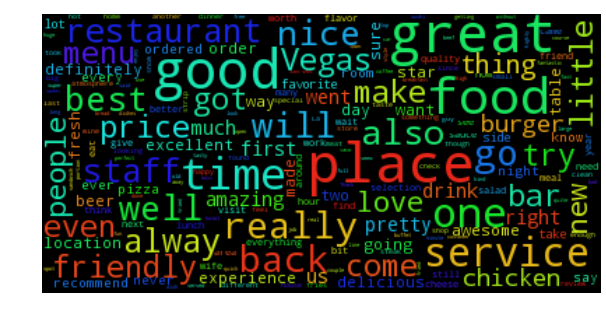

In [255]:
word_cloud(male_text)

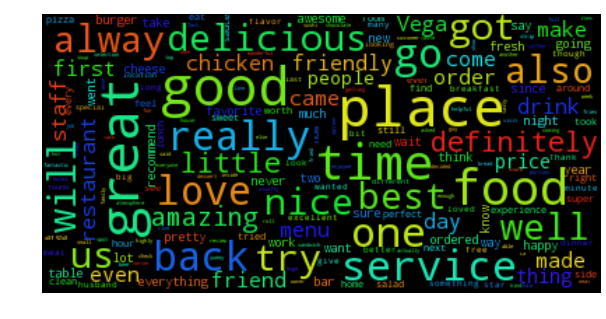

In [256]:
word_cloud(female_text)

### Bad Reviews

In [257]:
m_bad_reviews = get_bad_reviews(m_reviews)
f_bad_reviews = get_bad_reviews(f_reviews)

In [258]:
m_review_sample = random.sample(m_bad_reviews, 2000)
f_review_sample = random.sample(f_bad_reviews, 2000)

male_text = ". ".join([r['text'] for r in m_review_sample])
female_text = ". ".join([r['text'] for r in f_review_sample])

In [259]:
male_keywords = rake_object.run(male_text)

In [262]:
for k in male_keywords[0:15]:
    print k[0]

In [260]:
female_keywords = rake_object.run(female_text)

In [263]:
for k in female_keywords[0:15]:
    print k[0]

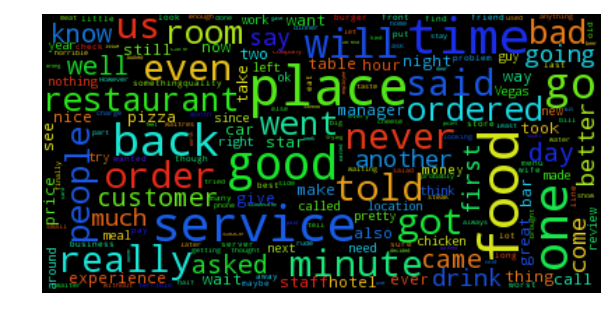

In [264]:
word_cloud(male_text)

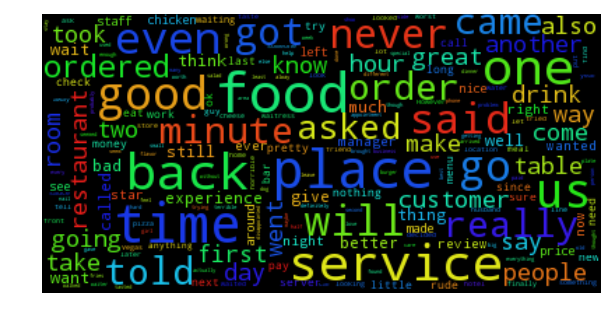

In [265]:
word_cloud(female_text)

<h1 align="center">Behavior Analysis</h1>

In [124]:
from collections import Counter
import pandas
import numpy as np

### 1. Business Types

In [70]:
business = {}

with open("/Users/erichsu/Documents/research/yelp_dataset/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "rb") as f:
    for line in f:
        info = json.loads(line.strip())
        business[info['business_id']] = info

In [71]:
m_good_reviews = get_good_reviews(m_reviews)
f_good_reviews = get_good_reviews(f_reviews)

In [72]:
def count_best(review_set, business):
    type_set = []
    
    for r in review_set:
        bid = r['business_id']
        bus = business[bid]
        type_set.extend(bus['categories'])
    
    c = dict(Counter(type_set))
    sorted_c = sorted(c.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_c[0:20]

In [73]:
count_best(m_good_reviews, business)

[(u'Restaurants', 301385),
 (u'Nightlife', 62012),
 (u'Bars', 55524),
 (u'Food', 54352),
 (u'American (New)', 37360),
 (u'American (Traditional)', 34750),
 (u'Mexican', 29978),
 (u'Breakfast & Brunch', 28970),
 (u'Arts & Entertainment', 27636),
 (u'Pizza', 26946),
 (u'Italian', 25792),
 (u'Shopping', 24144),
 (u'Event Planning & Services', 22719),
 (u'Hotels & Travel', 21734),
 (u'Sandwiches', 20601),
 (u'Burgers', 20434),
 (u'Steakhouses', 18354),
 (u'Hotels', 16830),
 (u'Japanese', 16523),
 (u'Sushi Bars', 15598)]

In [74]:
count_best(f_good_reviews, business)

[(u'Restaurants', 337843),
 (u'Food', 80065),
 (u'Nightlife', 70547),
 (u'Bars', 61472),
 (u'Beauty & Spas', 46952),
 (u'American (New)', 46638),
 (u'Breakfast & Brunch', 37805),
 (u'American (Traditional)', 37605),
 (u'Shopping', 35144),
 (u'Arts & Entertainment', 34809),
 (u'Mexican', 31896),
 (u'Event Planning & Services', 31019),
 (u'Italian', 29417),
 (u'Pizza', 28236),
 (u'Hotels & Travel', 26185),
 (u'Sandwiches', 22031),
 (u'Coffee & Tea', 20923),
 (u'Hotels', 20652),
 (u'Japanese', 20304),
 (u'Sushi Bars', 19891)]

### 2. Preference of Food

In [85]:
food_cat_list = """
 Restaurants
 Fast Food
 Sandwiches
 Pizza
 Nightlife
 American (Traditional)
 Bars
 Chinese
 Food
 Burgers
 Mexican
 American (New)
 Chicken Wings
 Breakfast & Brunch
 Italian
 Barbeque
 Cafes
 Korean
 Pubs
 Asian Fusion
 Thai
 Japanese
 Salad
 Sushi Bars
 Steakhouses
"""

In [87]:
types = []

for line in food_cat_list.split("\n"):
    tp = line.strip()
    if len(tp) !=0:
        types.append(tp)

In [102]:
len(reviews)

2225213

In [103]:
review_samples = random.sample(reviews, 25213)


In [159]:
def get_review_for_type(tp, business):
    ret = []
    
    for bus_key in business.keys():
        bus = business[bus_key]
        if tp in bus['categories']:
            ret.append(bus_key)
            
    return ret

def get_stats(tp, business, reviews, users):
    
    bar = pyprind.ProgBar(len(reviews), width = 80)
    
    mtp = 0.
    ftp = 0.
    
    all_bus_keys = get_review_for_type(tp, business)
    
    for review in reviews:
        bar.update()
        
        bus_id = review['business_id']
        if bus_id in all_bus_keys:
            user_id = review['user_id']
            gender = users[user_id]['gender']

            if gender == "male":
                mtp += 1.
            elif gender == "female":
                ftp += 1.
                
    return (mtp, ftp)

def get_good_stats(tp, business, reviews, users):
    
    bar = pyprind.ProgBar(len(reviews), width = 80)
    
    mtp = 0.
    ftp = 0.
    
    gmtp = 0.
    gftp = 0.
    
    all_bus_keys = get_review_for_type(tp, business)
    
    for review in reviews:
        bar.update()
        
        bus_id = review['business_id']
        if bus_id in all_bus_keys:
            user_id = review['user_id']
            stars = review['stars']
            gender = users[user_id]['gender']

            if gender == "male":
                mtp += 1.
                if stars >= 5:
                    gmtp += 1.
            elif gender == "female":
                ftp += 1.
                if stars >= 5:
                    gftp += 1.
                
    return (gmtp/mtp, gftp/ftp)

def plot_pie(tp, info):
    labels = ["male", "female"]
    sizes = list(info[tp])
    sizes[1] = sizes[1]/37.8*32.6
    colors = ['yellowgreen', 'lightcoral']
    explode = (0.1, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(tp+"\n")
    plt.axis('equal')
    plt.show()
    
    
def plot_bar_h(types, info, insize):
    #plt.figure(figsize=insize)
    ndata = [info[tp][0] for tp in types]
    mdata = [info[tp][1] for tp in types]
    
    df = pandas.DataFrame(dict(graph=types,
                           n=ndata, m=mdata)) 

    ind = np.arange(len(df))
    width = 0.3

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=insize)
    ax = fig.add_subplot(111)
    ax.barh(ind + width, df.m, width, color='pink', label='Female')
    ax.barh(ind, df.n, width, color='green', label='Male')
    ax.grid()

    ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
    ax.legend()
    
    plt.show()

In [118]:
type_stats = {}
for tp in types:
    type_stats[tp] = get_stats(tp, business, review_samples, users)

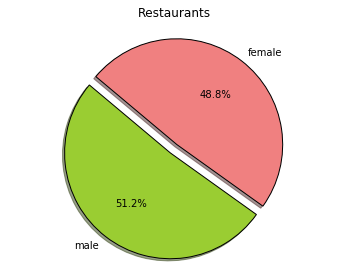

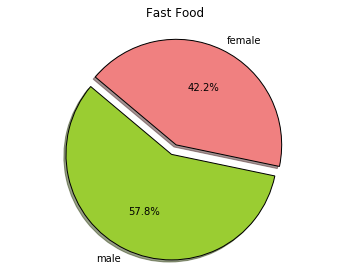

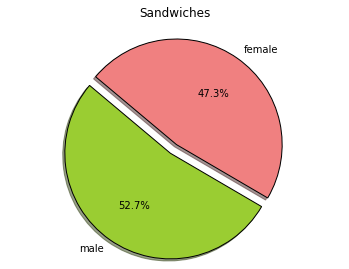

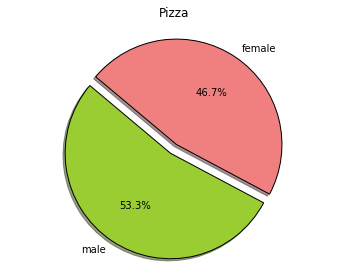

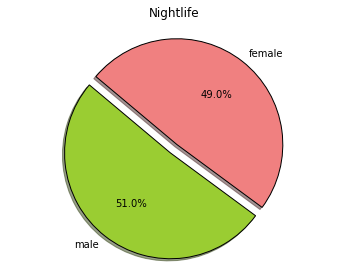

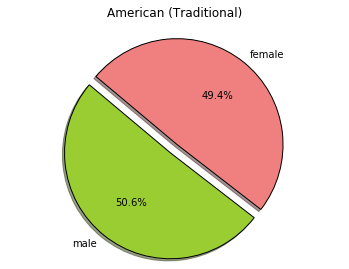

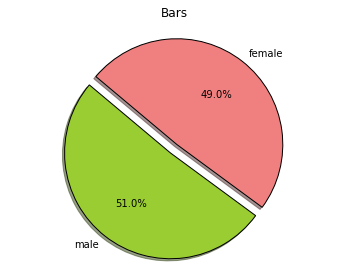

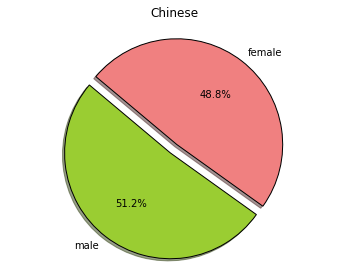

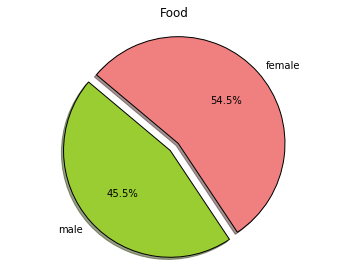

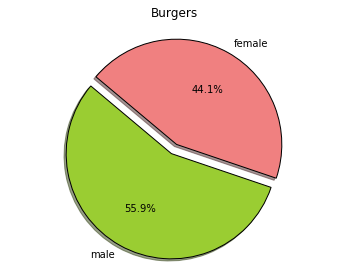

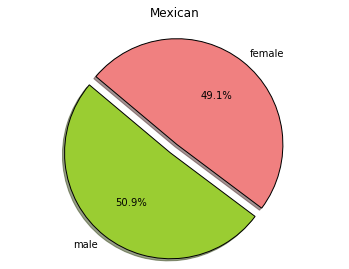

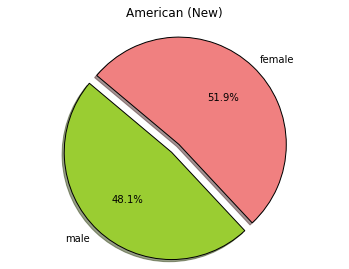

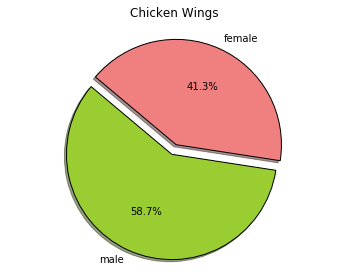

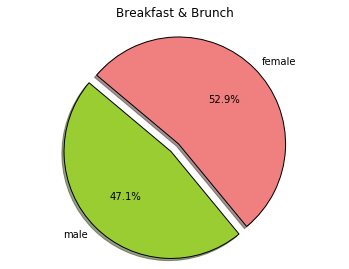

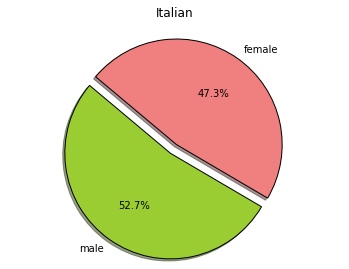

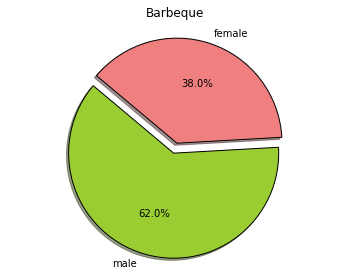

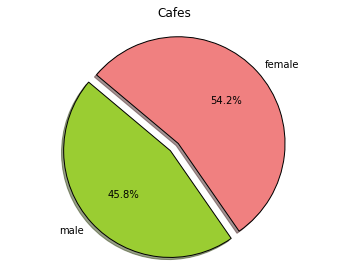

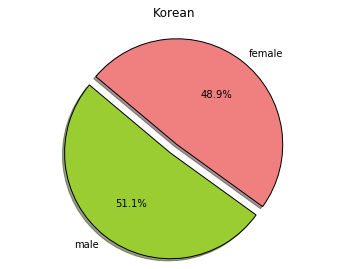

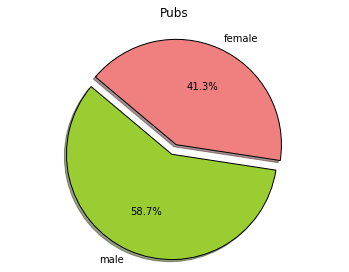

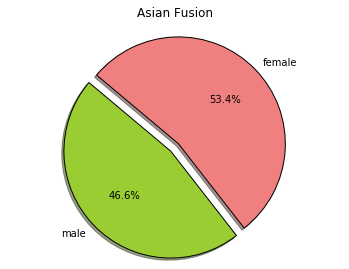

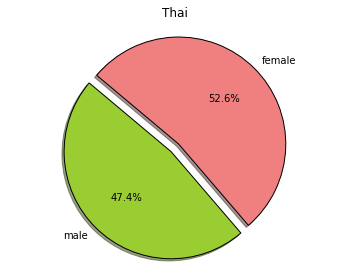

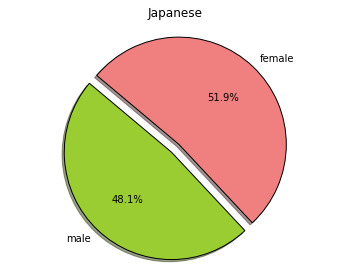

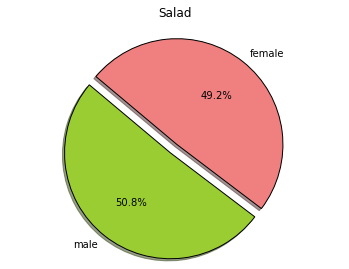

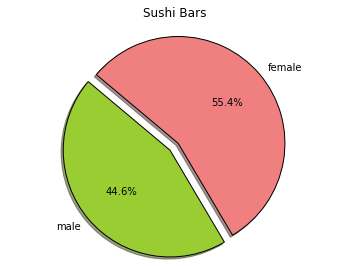

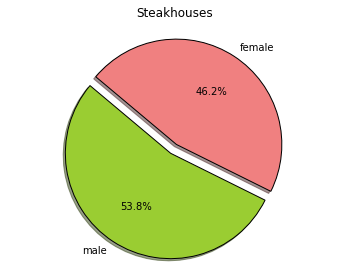

In [120]:
for tp in types:
    plot_pie(tp, type_stats)

In [151]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [127]:
type_good_stats = {}
for tp in types:
    type_good_stats[tp] = get_good_stats(tp, business, review_samples, users)

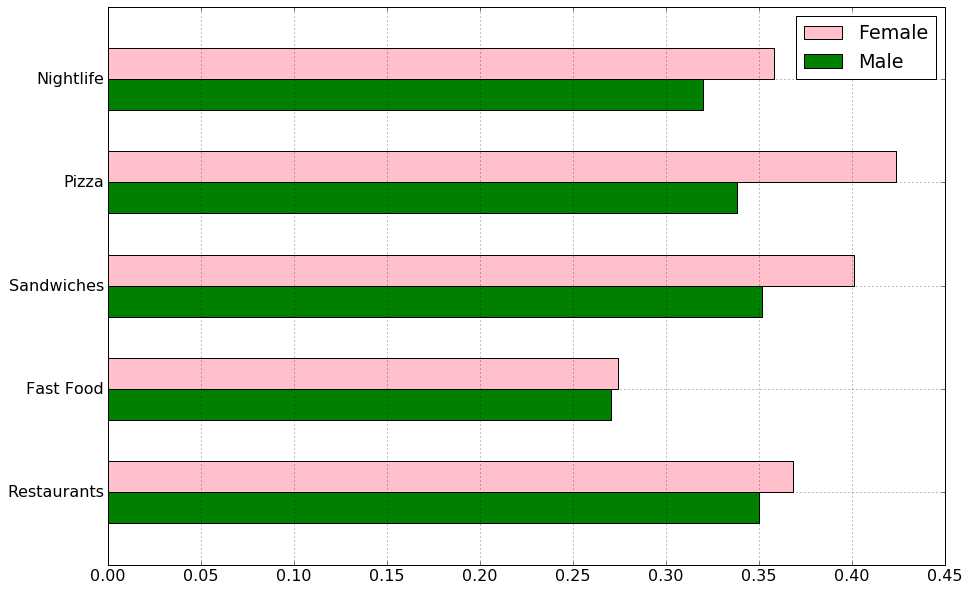

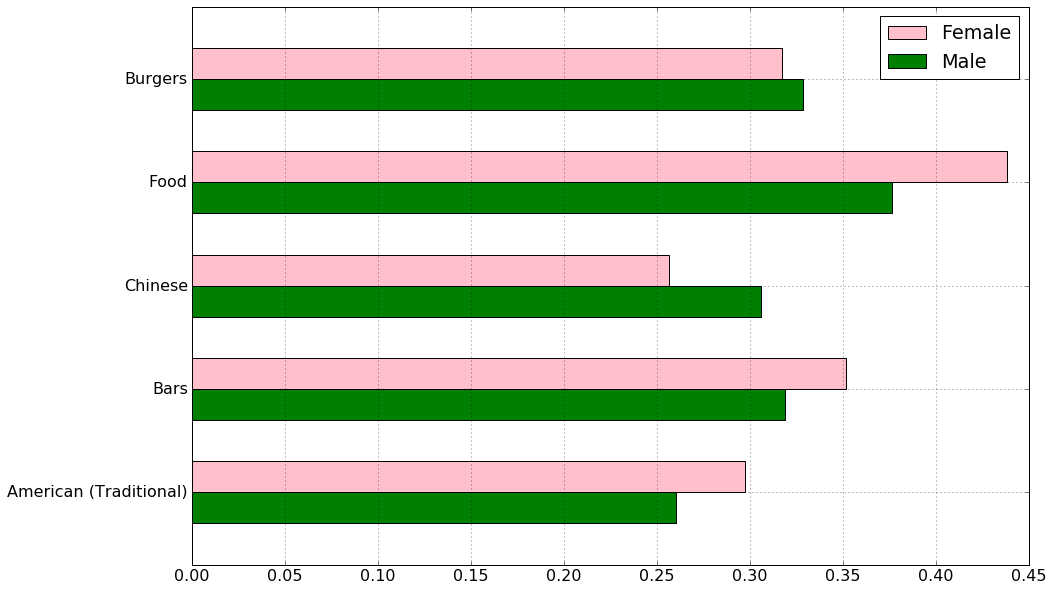

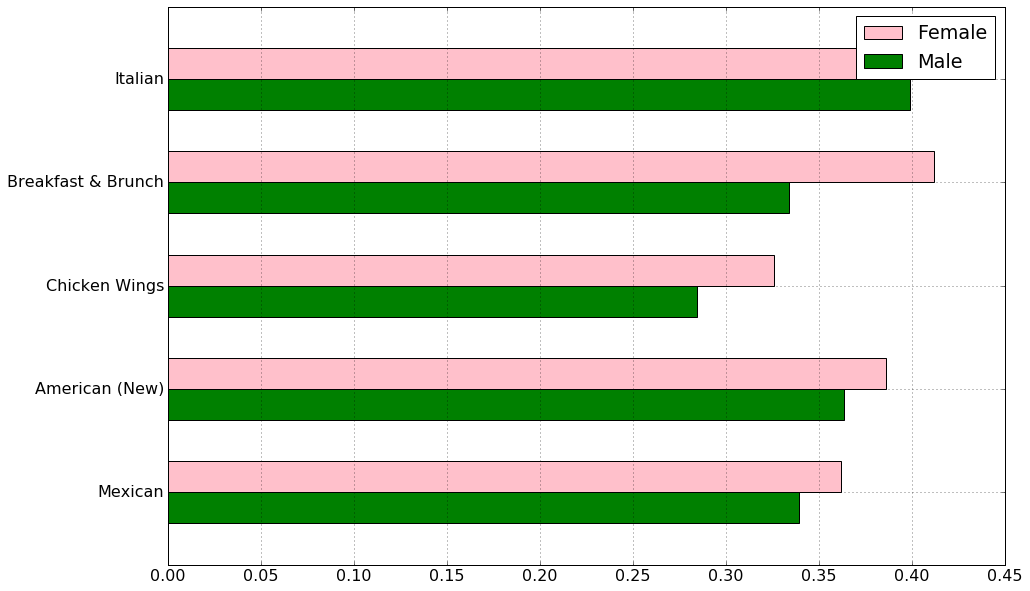

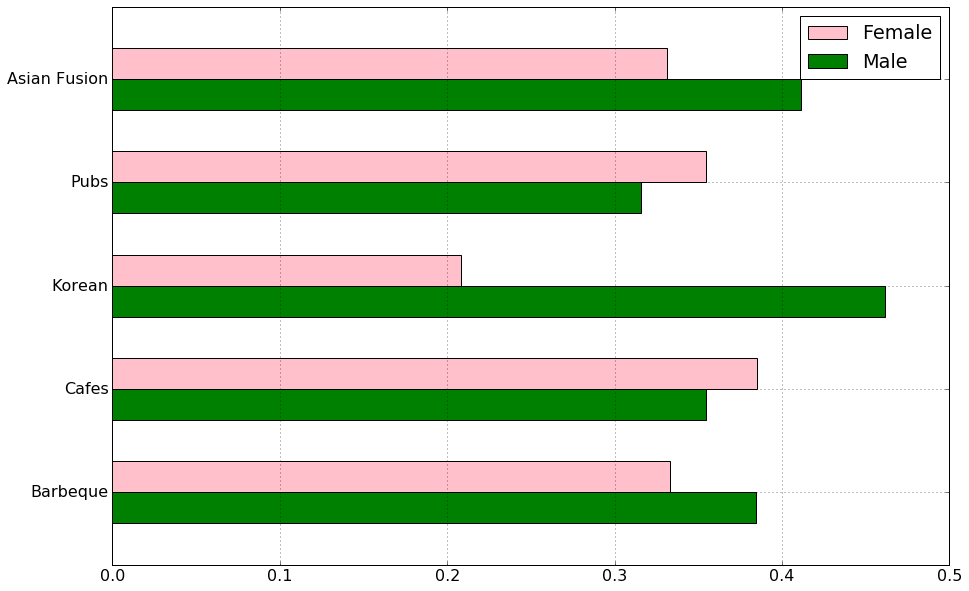

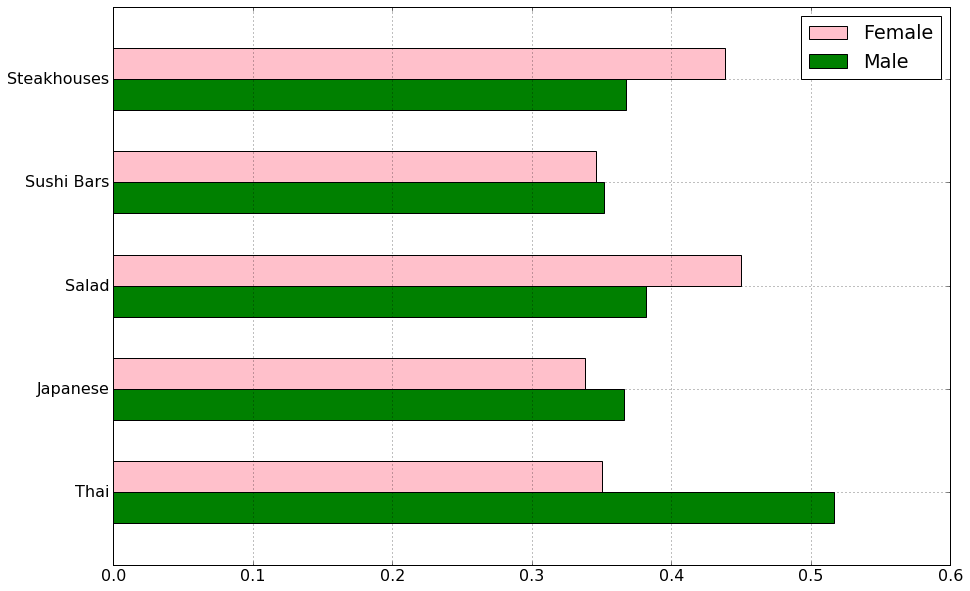

In [271]:
for ix in [0,5,10,15,20]:
    plot_bar_h(types[ix:ix+5], type_good_stats, (15,10))

In [270]:
len(types)

25

### 3. gender of friends

In [165]:
matplotlib.rcParams.update({'font.size': 16})

In [166]:
def get_gender(user):
    return user['gender']

def friend_stats(user, users):
    fs = user['friends']
    
    gender_stats = []
    
    for uid in fs:
        f_user = users[uid]
        gender = get_gender(f_user)
        if gender != 'unknown':
            gender_stats.append(gender)
        
    stats = Counter(gender_stats)
    
    total = float(sum(stats.values()))
        
    return stats

def get_average(arr):
    return sum(arr)/float(len(arr))

In [167]:
male_users = [user for user in users.values() if user['gender'] == 'male']
female_users = [user for user in users.values() if user['gender'] == 'female']

#### male stats

In [168]:
stats_list = []

for m_user in male_users:
    stats = friend_stats(m_user, users)
    stats_list.append(stats)

males = [st['male'] for st in stats_list]
females = [st['female'] for st in stats_list]

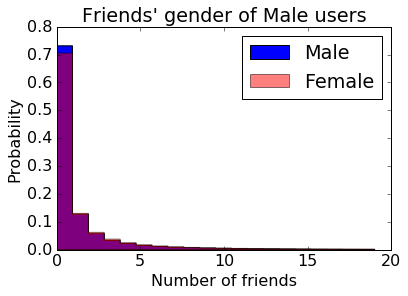

In [173]:
plt.hist([n for n in males if n <20], bins=20, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist([n for n in females if n <20], bins=20, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Friends' gender of Male users")
plt.xlabel("Number of friends")
plt.ylabel("Probability")
plt.legend()
plt.show()

#### female stats

In [171]:
stats_list = []

for m_user in female_users:
    stats = friend_stats(m_user, users)
    stats_list.append(stats)

males = [st['male'] for st in stats_list]
females = [st['female'] for st in stats_list]

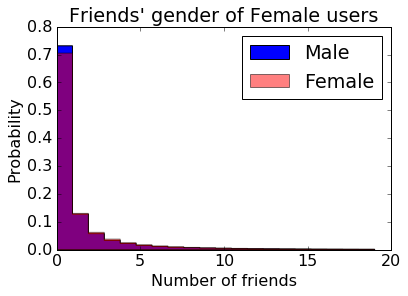

In [174]:
plt.hist([n for n in males if n <20], bins=20, histtype='stepfilled', normed=True, color='b', label='Male')
plt.hist([n for n in females if n <20], bins=20, histtype='stepfilled', normed=True, color='r', alpha=0.5, label='Female')
plt.title("Friends' gender of Female users")
plt.xlabel("Number of friends")
plt.ylabel("Probability")
plt.legend()
plt.show()

### 4. number of friends

In [175]:
male_fr_count = get_average([len(user['friends']) for user in male_users])
female_fr_count = get_average([len(user['friends']) for user in female_users])

print "Male_AVG", male_fr_count
print "Female_AVG", female_fr_count

In [176]:
male_fr_count

6.367569006538775

In [177]:
female_fr_count

6.761210027417973

### 5. Votes

In [214]:
# u'votes': {u'cool': 0, u'funny': 0, u'useful': 0}}

In [215]:
def vote_stats(review_set):
    stats = [0.,0.,0.]
    
    for review in review_set:
        votes = review['votes']
        stats[0] += votes['cool']
        stats[1] += votes['funny']
        stats[2] += votes['useful']
    length = len(review_set)
    return [n/length for n in stats]

In [216]:
m_stats = vote_stats(m_reviews)
f_stats = vote_stats(f_reviews)

In [217]:
m_stats

[0.5187137705965585, 0.4479779999087133, 0.9742115112510841]

In [218]:
f_stats

[0.5898591744150521, 0.44248862961660623, 1.0773854747315206]

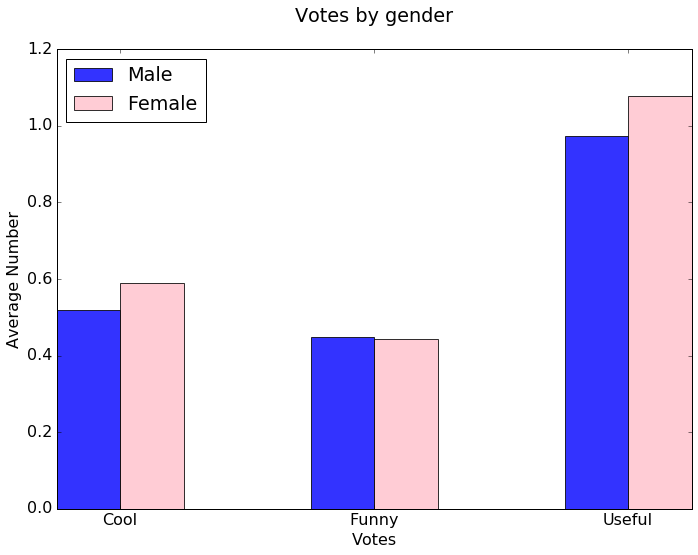

In [237]:
# data to plot
n_groups = 3
means_frank = m_stats
means_guido = f_stats
 
# create plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

index = np.arange(n_groups)

bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Male')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Female')

plt.xlabel('Votes')
plt.ylabel('Average Number')
plt.title('Votes by gender\n')
plt.xticks(index + bar_width, ('Cool', 'Funny', 'Useful'))
plt.legend(loc=0)
plt.tight_layout()
plt.show()

<h1 align = "center">Can you tell the differences?</h1>

In [204]:
random_100 = random.sample(reviews, 100)

In [205]:
r10 = []

for review in random_100:
    if len(r10) == 10:
        break
        
    user = users[review['user_id']]
    g = user['gender']
    if g == "unknown":
        continue

    for cat in business[review['business_id']]['categories']:
        if cat in types:
            r10.append(review)
            break

In [206]:
correct_answer = []

for review in r10:
    user = users[review['user_id']]
    correct_answer.append(user['gender'])

In [212]:
test_info = {}

for review in r10:
    test_info[review['review_id']] = {}
    test_info[review['review_id']]['text'] = review['text']
    test_info[review['review_id']]['stars'] = review['stars']
    
    bus = business[review['business_id']]
    test_info[review['review_id']]['business_categories'] = bus['categories']
    test_info[review['review_id']]['business_name'] = bus['name']

In [274]:
test_info

{u'D_TuMIyv0R7TzAE7fMv7Hg': {'business_categories': [u'Food',
   u'Bakeries',
   u'Coffee & Tea',
   u'American (New)',
   u'Restaurants'],
  'business_name': u'Lux Central',
  'stars': 4,
  'text': u'Today I road bikes with my girlfriend to this little trendy coffee located in Central Phoenix that I quickly fell in love with. There was a variety of choices of drinks, breakfast sandwiches and pastries to choose from and everything looked and smelled delicious. There was plenty of parking and seating both inside and outside. The service was very good considering the place was packed with customers, which speaks for itself!  I will definitely be back again to support yet another great local spot:)'},
 u'Jc0npU-gvTD0EAuOBVFTaw': {'business_categories': [u'Buffets',
   u'Restaurants'],
  'business_name': u'Bistro Buffet',
  'stars': 5,
  'text': u"My group stayed at the Palms so we decided to try their buffet.\n\nI was very surprised on how good some of the items were.  This buffet does no

In [275]:
for r in reviews:
    if r['review_id'] == 'D_TuMIyv0R7TzAE7fMv7Hg':
        print r

In [272]:
for a in correct_answer:
    print a

In [211]:
reviews['5UmKMjUEUNdYWqANhGckJw']

{u'attributes': {u'Accepts Credit Cards': True,
  u'Alcohol': u'none',
  u'Ambience': {u'casual': False,
   u'classy': False,
   u'divey': False,
   u'hipster': False,
   u'intimate': False,
   u'romantic': False,
   u'touristy': False,
   u'trendy': False,
   u'upscale': False},
  u'Attire': u'casual',
  u'Caters': False,
  u'Delivery': False,
  u'Drive-Thru': False,
  u'Good For': {u'breakfast': False,
   u'brunch': False,
   u'dessert': False,
   u'dinner': False,
   u'latenight': False,
   u'lunch': False},
  u'Good For Groups': True,
  u'Good for Kids': True,
  u'Has TV': False,
  u'Noise Level': u'average',
  u'Outdoor Seating': False,
  u'Parking': {u'garage': False,
   u'lot': False,
   u'street': False,
   u'valet': False,
   u'validated': False},
  u'Price Range': 1,
  u'Take-out': True,
  u'Takes Reservations': False,
  u'Waiter Service': False},
 u'business_id': u'5UmKMjUEUNdYWqANhGckJw',
 u'categories': [u'Fast Food', u'Restaurants'],
 u'city': u'Dravosburg',
 u'full_addre

In [210]:
reviews[1]

{u'business_id': u'5UmKMjUEUNdYWqANhGckJw',
 u'date': u'2014-02-13',
 u'review_id': u'KPvLNJ21_4wbYNctrOwWdQ',
 u'stars': 5,
 u'text': u"Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition.",
 'text_blob': TextBlob("Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition."),
 u'type': u'review',
 u'user_id': u'Iu6AxdBYGR4A0wspR9BYHA',
 u'votes': {u'cool': 0, u'funny': 0, u'useful': 0}}

In [ ]:
text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
blob.words